## Dataset Overview
This dataset provides daily weather information for Australia, dating back to 2008. Each observation represents a single day in a given location. The data provided relates to weather conditions throughout the day such as wind and wind direction, temperature, humidity, pressure, whether it rained today and whether or not it rained the following day.

The dataset contains **145,460 observations across 24 columns** and can be found at the following link: 

https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn import ensemble
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE


%matplotlib inline

## Read dataset in and begin investigating its properties

In [34]:
weather = pd.read_csv('weatherAUS.csv')

In [35]:
weather.shape

(145460, 24)

In [36]:
weather.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [37]:
pd.options.display.max_rows = 999
weather.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [38]:
weather.describe()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142193.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,2.360682
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,0.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,371.000000


## Exploratory Analysis (Univariate and Bivariate)

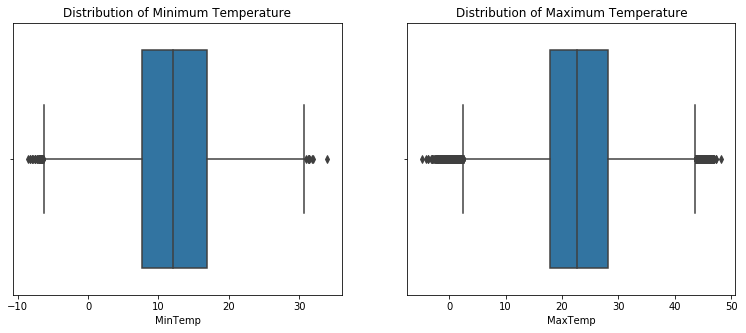

count    143975.000000
mean         12.194034
std           6.398495
min          -8.500000
25%           7.600000
50%          12.000000
75%          16.900000
max          33.900000
Name: MinTemp, dtype: float64
count    144199.000000
mean         23.221348
std           7.119049
min          -4.800000
25%          17.900000
50%          22.600000
75%          28.200000
max          48.100000
Name: MaxTemp, dtype: float64


In [39]:
#Start with MinTemp and MaxTemp

plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
sns.boxplot(x=weather["MinTemp"])
plt.title('Distribution of Minimum Temperature')

plt.subplot(1,3,2)
sns.boxplot(x=weather["MaxTemp"])
plt.title('Distribution of Maximum Temperature')
plt.show()

print(weather['MinTemp'].describe())
print(weather['MaxTemp'].describe())

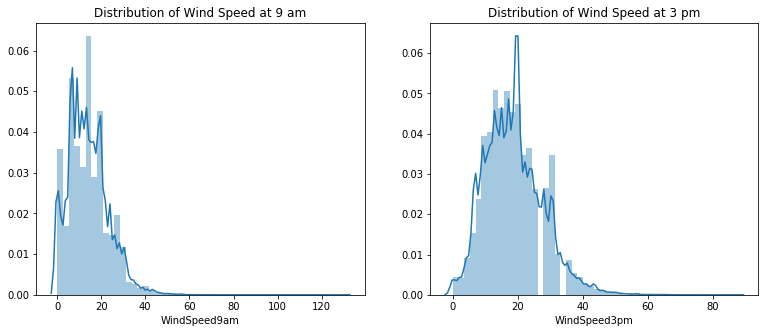

In [40]:
#Next look at Wind Speed

plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
sns.distplot(weather['WindSpeed9am'].dropna())
plt.title('Distribution of Wind Speed at 9 am')

plt.subplot(1,3,2)
sns.distplot(weather['WindSpeed3pm'].dropna())
plt.title('Distribution of Wind Speed at 3 pm')
plt.show()

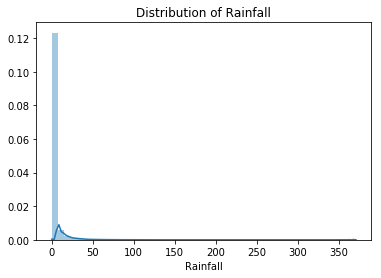

count    142199.000000
mean          2.360918
std           8.478060
min           0.000000
25%           0.000000
50%           0.000000
75%           0.800000
max         371.000000
Name: Rainfall, dtype: float64


In [41]:
#Next, look at rainfall

sns.distplot(weather['Rainfall'].dropna())
plt.title('Distribution of Rainfall')
plt.show()
print(weather['Rainfall'].describe())

Will need to remove right skewness due to extreme outlier in data cleaning section. If you look at the describe method results, you'll see a maximum of 371, when 75% of the data is under 0.8.

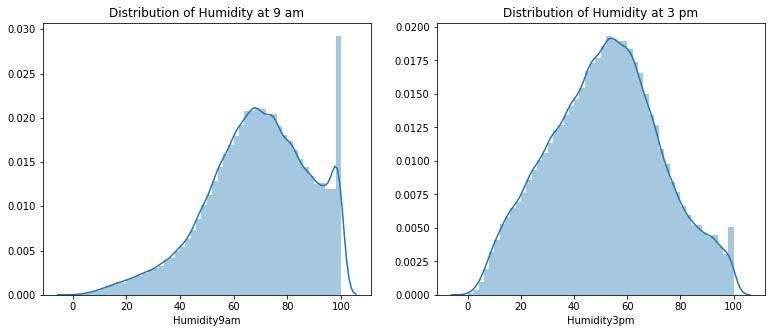

In [42]:
#Next look at Humidity

plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
sns.distplot(weather['Humidity9am'].dropna())
plt.title('Distribution of Humidity at 9 am')

plt.subplot(1,3,2)
sns.distplot(weather['Humidity3pm'].dropna())
plt.title('Distribution of Humidity at 3 pm')
plt.show()

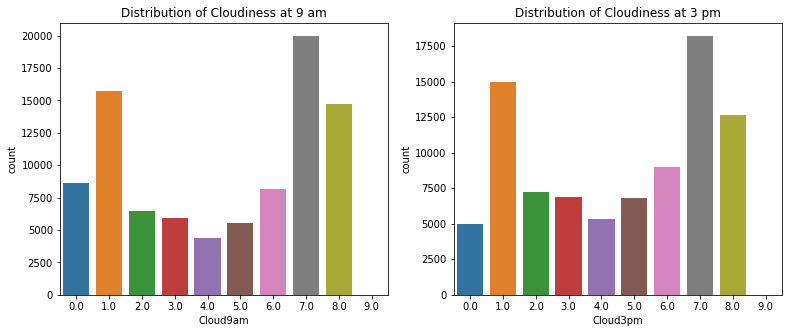

In [43]:
#Next, look at cloudiness

plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
sns.countplot(x=weather['Cloud9am'].dropna(), data=weather)
plt.title('Distribution of Cloudiness at 9 am')


plt.subplot(1,3,2)
sns.countplot(x=weather['Cloud3pm'].dropna(), data=weather)
plt.title('Distribution of Cloudiness at 3 pm')
plt.show()

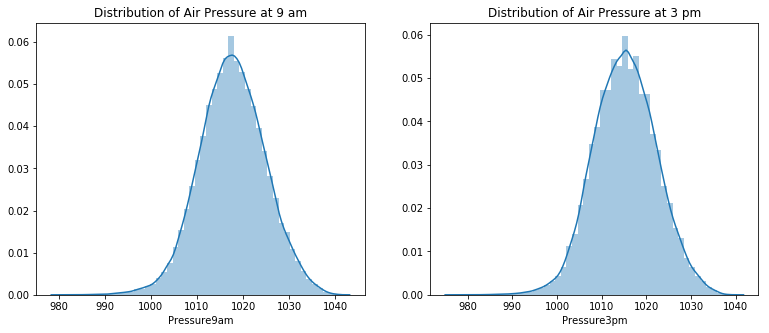

In [44]:
#Next, look at air pressure

plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
sns.distplot(weather['Pressure9am'].dropna())
plt.title('Distribution of Air Pressure at 9 am')

plt.subplot(1,3,2)
sns.distplot(weather['Pressure3pm'].dropna())
plt.title('Distribution of Air Pressure at 3 pm')
plt.show()

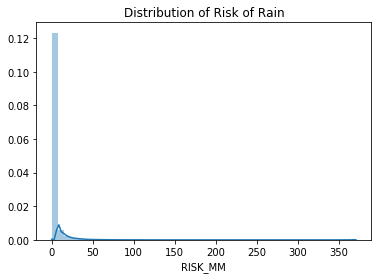

count    142193.000000
mean          2.360682
std           8.477969
min           0.000000
25%           0.000000
50%           0.000000
75%           0.800000
max         371.000000
Name: RISK_MM, dtype: float64


In [45]:
#Finally, look at Risk of Rain
sns.distplot(weather['RISK_MM'].dropna())
plt.title('Distribution of Risk of Rain')
plt.show()
print(weather['RISK_MM'].describe())

Similar to Rainfall feature above, the extreme outlier will have to be removed.

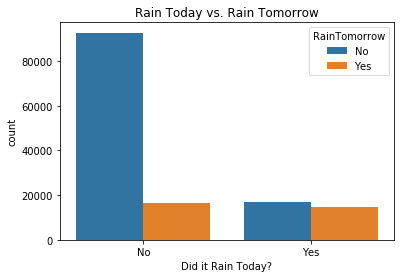

In [46]:
#Now look at Rain Today and whether or not it rained the next day (Rain Tomorrow)
sns.countplot(x='RainToday', hue='RainTomorrow', data=weather)
plt.title('Rain Today vs. Rain Tomorrow')
plt.xlabel('Did it Rain Today?')
plt.show()

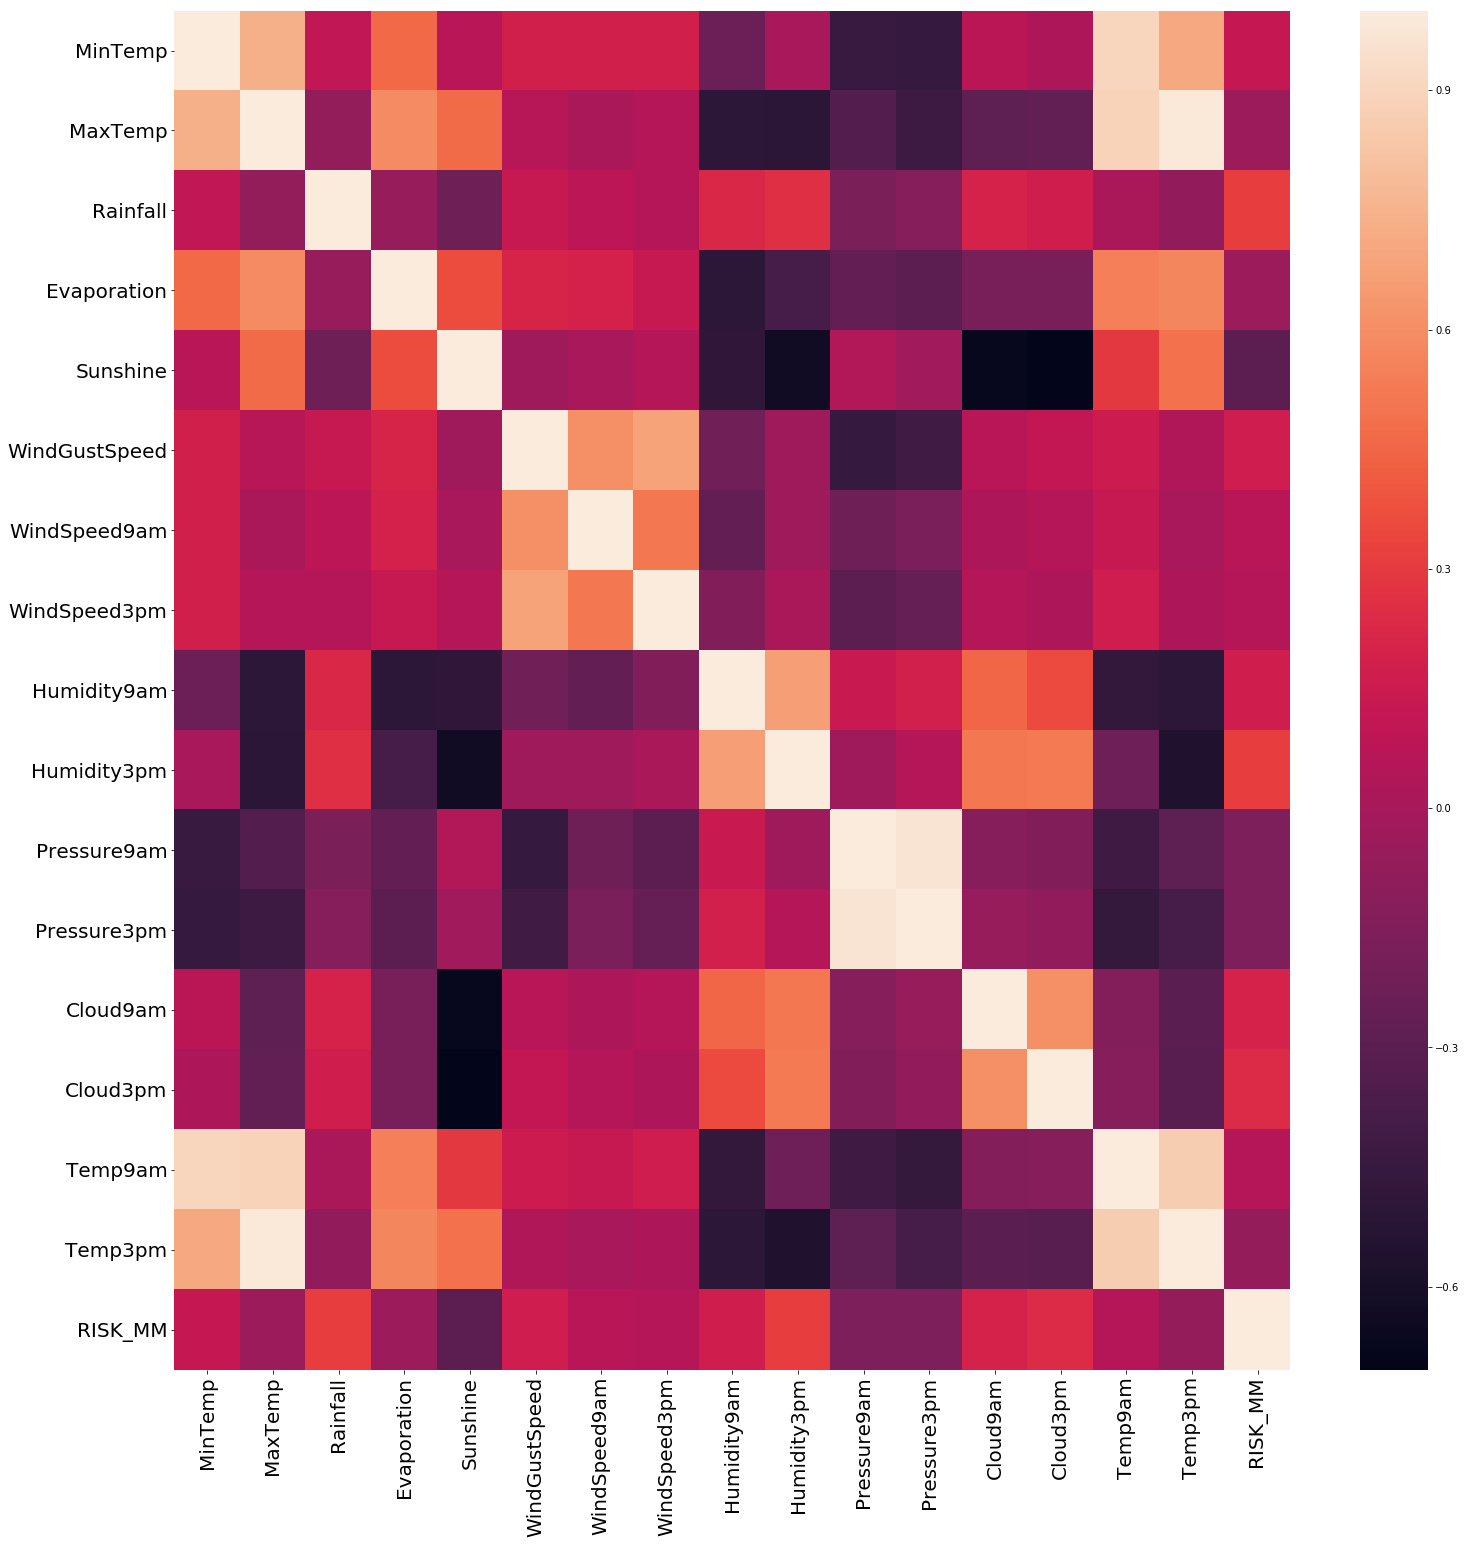

In [47]:
#Correlation matrix with sns.heatmap

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(25, 25))

sns.heatmap(weather.corr())
plt.xticks(size=20)
plt.yticks(size=20, rotation='horizontal')
plt.show()

## Data Cleaning

In [48]:
#Determine missing values across dataframe

missing_values_count = weather.isnull().sum()
print(missing_values_count)

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RISK_MM           3267
RainTomorrow      3267
dtype: int64


In [49]:
#Due to the magnitude of missing values, in order to not harm the integrity of the data, 
#we will simply drop all NaNs for the time being.

weather = weather.dropna()

## Feature Selection / Engineering

In [50]:
#Change RainToday & RainTomorrow to binary
weather['RainToday'] = np.where((weather['RainToday'] == 'Yes'), 1, 0) #Rain = 1, No Rain = 0
weather['RainTomorrow'] = np.where((weather['RainTomorrow'] == 'Yes'), 1, 0) #Rain = 1, No Rain = 0

In [51]:
#Get rid of skewness/outliers in Risk of Rain
weather['Rainfall'].quantile(0.95)

12.2

In [52]:
#Transform Risk of Rain based on quantile method above
weather = weather[weather['Rainfall'] <= 12.2]

Based on the fact that RISK_MM may have inherent predictive quality, we will remove it. 

In [53]:
#Drop features
weather = weather.drop(['Date'], 1)
weather = weather.drop(['RISK_MM'], 1)

## Define Research Question

**Background:**It seems that the public is always blaming the "weatherman" when a prediction proves to be false. Inaccurate predictions can be quite impactful, from ruining plans or events to causing dangerous road conditions. Being able to predict, to a very high degree of certainty, whether or not certain weather conditions will occur would be an extremely useful model.

**Research Question:**Will it rain tomorrow?

**Methodology:**First determine baseline accuracy, then use a number of different classification models to fit our data and predict accuracy. Based on the results, refine and tune in order to achieve the highest accuracy, in both training and test data. 

## Create Repeatable Functions for Each Model Type

In [54]:
#Establish X and Y
#Use pd.get_dummies for X because WindGustDir, WindDir9am, WindDir3pm are categorical

X = weather.drop(['RainTomorrow'], 1)
X = pd.get_dummies(X)
Y = weather.RainTomorrow

#Show final feature count that goes into model
print(X.shape)

(53622, 91)


## Naive Bayes

In [55]:
#Create Function

def NB_Model(model):
        import timeit
        start = timeit.default_timer()
        if model == 'Bernoulli':
                NB_Model = BernoulliNB()
                NB_Model.fit(X, Y)
                positive_pred = NB_Model.predict(X)
                print('\n Percentage accuracy for Bernoulli Naive Bayes')
        
        elif model == 'Gaussian':
                NB_Model = GaussianNB()
                NB_Model.fit(X, Y)
                positive_pred = NB_Model.predict(X)
                print('\n Percentage accuracy for Gaussian Naive Bayes')

        else:
                NB_Model = MultinomialNB()
                NB_Model.fit(X, Y)
                positive_pred = NB_Model.predict(X)
                print('\n Percentage accuracy for Multinomial Naive Bayes')
            
        print(str(NB_Model.score(X, Y)*100) + '%')
        print('\n Cross-Validation Score')
        print(cross_val_score(NB_Model, X, Y, cv=5))
        print('\n Confusion Matrix')
        display(confusion_matrix(Y, positive_pred))
        
        #Print time
        stop = timeit.default_timer()
        execution_time = stop - start
        print("\n\n Program Executed in {}".format(round(execution_time, 2)))

## K-Nearest Neighbors

In [56]:
#Create function

def KNN_Model(k, weight):
    import timeit
    start = timeit.default_timer()
    KNN = KNeighborsClassifier(n_neighbors=k, weights=weight)
    KNN.fit(X, Y)
    positive_pred = KNN.predict(X)
    print('\n Percentage accuracy for K Nearest Neighbors Classifier')
    print(str(KNN.score(X, Y)*100) + '%')
    print('\n Cross-Validation Score')
    print(cross_val_score(KNN, X, Y, cv=5))
    print('\n Confusion Matrix')
    display(confusion_matrix(Y, positive_pred))
    
    #Print time
    stop = timeit.default_timer()
    execution_time = stop - start
    print("\n\n Program Executed in {}".format(round(execution_time, 2)))

## Random Forest

In [57]:
#Create function

def RFC_Model(trees, criteria, num_features, depth):
    import timeit
    start = timeit.default_timer()
    rfc = ensemble.RandomForestClassifier(n_estimators=trees, criterion=criteria, max_features=num_features, max_depth=depth)
    rfc.fit(X, Y)
    positive_pred = rfc.predict(X)
    print('\n Percentage accuracy for Random Forest Classifier')
    print(str(rfc.score(X, Y)*100) + '%')
    print('\n Cross-Validation Score')
    print(cross_val_score(rfc, X, Y, cv=5))
    print('\n Confusion Matrix')
    display(confusion_matrix(Y, positive_pred))
    
    #Print time
    stop = timeit.default_timer()
    execution_time = stop - start
    print("\n\n Program Executed in {}".format(round(execution_time, 2)))

## Logistic Regression

In [58]:
#Create function

def Logistic_Reg_Model(regularization, alpha):
    import timeit
    start = timeit.default_timer()
    if regularization == 'l1':
        lr_lasso = LogisticRegression(penalty=regularization, C=alpha)
        lr_lasso.fit(X, Y)
        positive_pred = lr_lasso.predict(X)
        print('\n Percentage accuracy for Lasso Logistic Regression')
        print(str(lr_lasso.score(X, Y)*100) + '%')
        print('\n Cross-Validation Score')
        print(cross_val_score(lr_lasso, X, Y, cv=5))
        print('\n Confusion Matrix')
        display(confusion_matrix(Y, positive_pred))
        
    elif regularization == 'l2' and alpha == 1e9:
        lr_regular = LogisticRegression(penalty=regularization, C=alpha)
        lr_regular.fit(X, Y)
        positive_pred = lr_regular.predict(X)
        print('\n Percentage accuracy for Logistic Regression')
        print(str(lr_regular.score(X, Y)*100) + '%')
        print('\n Cross-Validation Score')
        print(cross_val_score(lr_regular, X, Y, cv=5))
        print('\n Confusion Matrix')
        display(confusion_matrix(Y, positive_pred))
    else:
        lr_ridge = LogisticRegression(penalty=regularization, C=alpha)
        lr_ridge.fit(X, Y)
        positive_pred = lr_ridge.predict(X)
        print('\n Percentage accuracy for Ridge Logistic Regression')
        print(str(lr_ridge.score(X, Y)*100) + '%')
        print('\n Cross-Validation Score')
        print(cross_val_score(lr_ridge, X, Y, cv=5))
        print('\n Confusion Matrix')
        display(confusion_matrix(Y, positive_pred))
        
     #Print time
    stop = timeit.default_timer()
    execution_time = stop - start
    print("\n\n Program Executed in {}".format(round(execution_time, 2)))

## Support Vector Classifer

In [59]:
#Create function

def SVC_Model(c, kernel_type):
    import timeit
    start = timeit.default_timer()
    svm = SVC(C=c, kernel=kernel_type)
    svm.fit(X, Y)
    positive_pred = svm.predict(X)
    print('\n Percentage accuracy for SVM')
    print(str(svm.score(X, Y)*100) + '%')
    print('\n Cross-Validation Score')
    print(cross_val_score(svm, X, Y, cv=5))
    print('\n Confusion Matrix')
    display(confusion_matrix(Y, positive_pred))
    
    #Print time
    stop = timeit.default_timer()
    execution_time = stop - start
    print("\n\n Program Executed in {}".format(round(execution_time, 2)))
    

## Gradient Boosting

In [60]:
#Create function

def Gradient_Boost_Model(estimators, depth, loss_function, sampling):
    import timeit
    start = timeit.default_timer()
    clf = ensemble.GradientBoostingClassifier(n_estimators=estimators, max_depth=depth, loss=loss_function, subsample=sampling)
    clf.fit(X, Y)
    positive_pred = clf.predict(X)
    print('\n Percentage accuracy for Gradient Boosting Classifier')
    print(str(clf.score(X, Y)*100) + '%')
    print('\n Cross-Validation Score')
    print(cross_val_score(clf, X, Y, cv=5))
    print('\n Confusion Matrix')
    display(confusion_matrix(Y, positive_pred))
    
    #Print time
    stop = timeit.default_timer()
    execution_time = stop - start
    print("\n\n Program Executed in {}".format(round(execution_time, 2)))

## Run Initial Models, Default Parameters

In [61]:
#Use a sample so that our models will run without using too much computing power
weather = weather.sample(n = 10000)

#Reestablish X and Y
X = weather.drop(['RainTomorrow'], 1)
X = pd.get_dummies(X)
Y = weather.RainTomorrow

In [62]:
#Calculate baseline accuracy for RainTomorrow
RainTomorrow_total = weather['RainTomorrow'].sum()
print('Baseline accuracy for Rain Tomorrow is: ' + str(round((RainTomorrow_total/weather.shape[0])*100, 2)) + '%')

Baseline accuracy for Rain Tomorrow is: 19.77%


In [63]:
#Run all models with default criteria, with returns in between so we can easily read

#Bernoulli Naive Bayes
NB_Model('Bernoulli')
print('\n\n')

#K-Nearest Neighbors
KNN_Model(5, 'uniform')
print('\n\n')

#Random Forest
RFC_Model(10, 'gini', 'auto', None)
print('\n\n')

#Plain Logistic Regression
Logistic_Reg_Model('l2', 1e9)
print('\n\n')

#Lasso Logistic Regression
Logistic_Reg_Model('l1', 1.0)
print('\n\n')

#Ridge Logistic Regression
Logistic_Reg_Model('l2', 1.0)
print('\n\n')

#Support Vector Classifier
SVC_Model(1.0, 'rbf')
print('\n\n')

#Gradient boost classifier
Gradient_Boost_Model(100, 3, 'deviance', 1.0)


 Percentage accuracy for Bernoulli Naive Bayes
78.21000000000001%

 Cross-Validation Score
[0.7946027  0.77011494 0.7735     0.7853927  0.77838919]

 Confusion Matrix


array([[7012, 1011],
       [1168,  809]])



 Program Executed in 0.29




 Percentage accuracy for K Nearest Neighbors Classifier
88.6%

 Cross-Validation Score
[0.83858071 0.85157421 0.8415     0.84392196 0.84292146]

 Confusion Matrix


array([[7747,  276],
       [ 864, 1113]])



 Program Executed in 12.78




 Percentage accuracy for Random Forest Classifier
98.47%

 Cross-Validation Score
[0.83958021 0.84157921 0.8495     0.84592296 0.84342171]

 Confusion Matrix


array([[8017,    6],
       [ 147, 1830]])



 Program Executed in 1.11




 Percentage accuracy for Logistic Regression
86.46000000000001%

 Cross-Validation Score
[0.85857071 0.86406797 0.862      0.86243122 0.85892946]

 Confusion Matrix


array([[7644,  379],
       [ 975, 1002]])



 Program Executed in 1.64




 Percentage accuracy for Lasso Logistic Regression
86.18%

 Cross-Validation Score
[0.85557221 0.85857071 0.8615     0.85742871 0.85342671]

 Confusion Matrix


array([[7648,  375],
       [1007,  970]])



 Program Executed in 283.28




 Percentage accuracy for Ridge Logistic Regression
86.52%

 Cross-Validation Score
[0.86056972 0.86206897 0.861      0.86193097 0.86093047]

 Confusion Matrix


array([[7650,  373],
       [ 975, 1002]])



 Program Executed in 1.62




 Percentage accuracy for SVM
96.12%

 Cross-Validation Score
[0.82408796 0.82808596 0.8175     0.82191096 0.82591296]

 Confusion Matrix


array([[8004,   19],
       [ 369, 1608]])



 Program Executed in 100.28




 Percentage accuracy for Gradient Boosting Classifier
87.85%

 Cross-Validation Score
[0.85407296 0.85657171 0.859      0.85342671 0.85992996]

 Confusion Matrix


array([[7749,  274],
       [ 941, 1036]])



 Program Executed in 13.71


## Finding the Right Values for our Parameters

In [95]:
def tuned_params(model):
    
        if model == 'KNN':
                KNN = np.arange(1, 501, 100)
                KNN_df = pd.DataFrame()
                for i in KNN:
                    KNN_model = KNeighborsClassifier(n_neighbors=i, weights='distance')
                    KNN_model.fit(X, Y)
                    positive_pred = KNN_model.predict(X)
                    cross_val = cross_val_score(KNN_model, X, Y, cv=5).mean()
                    score = KNN_model.score(X, Y)*100
                    KNN_df_temp = pd.DataFrame({'K': i, 'training': score, 'test': cross_val}, index=[0])
                    KNN_df = KNN_df.append(KNN_df_temp)
                plt.plot(KNN_df['training'], color = 'r', linewidth = 3, label='Training')
                plt.plot(KNN_df['test'], color = 'b', linewidth = 3, label='Test')
                plt.xlabel('K Parameter', fontsize=20)
                plt.title('KNN - Training vs. Test')
                plt.show()
                
        elif model == 'Random Forest':
                random_forest = np.arange(100, 500, 100)
                random_forest_df = pd.DataFrame()
                for i in random_forest:
                    rfc = ensemble.RandomForestClassifier(n_estimators=i)
                    rfc.fit(X, Y)
                    positive_pred = rfc.predict(X)
                    cross_val = cross_val_score(rfc, X, Y, cv=5).mean()
                    score = rfc.score(X, Y)*100
                    random_forest_df_temp = pd.DataFrame({'estimators': i, 'training': score, 'test': cross_val}, index=[0])
                    random_forest_df = random_forest_df.append(random_forest_df_temp)
                plt.plot(random_forest_df['training'], color = 'r', linewidth = 3, label='Training')
                plt.plot(random_forest_df['test'], color = 'b', linewidth = 3, label='Test')
                plt.xlabel('Estimators Parameter', fontsize=20)
                plt.title('Random Forest - Training vs. Test')
                plt.show()
        
        elif model == 'Lasso':
                lasso = np.arange(0.2, 1.0, 0.2)
                lasso_df = pd.DataFrame()
                for i in lasso:
                    lr_lasso = LogisticRegression(penalty='l1', C=i)
                    lr_lasso.fit(X, Y)
                    positive_pred = lr_lasso.predict(X)
                    cross_val = cross_val_score(lr_lasso, X, Y, cv=5).mean()
                    score = lr_lasso.score(X, Y)*100
                    lasso_df_temp = pd.DataFrame({'C': i, 'training': score, 'test': cross_val}, index=[0])
                    lasso_df = lasso_df.append(lasso_df_temp)
                plt.plot(lasso_df['training'], color = 'r', linewidth = 3, label='Training')
                plt.plot(lasso_df['test'], color = 'b', linewidth = 3, label='Test')
                plt.xlabel('C Parameter', fontsize=20)
                plt.title('Lasso - Training vs. Test')
                plt.show()
            
        elif model == 'Ridge':
                ridge = np.arange(0, 5000, 1000)
                ridge_df = pd.DataFrame()
                for i in ridge:
                    lr_ridge = LogisticRegression(C=i)
                    lr_ridge.fit(X, Y)
                    positive_pred = lr_ridge.predict(X)
                    cross_val = cross_val_score(lr_ridge, X, Y, cv=5).mean()
                    score = lr_ridge.score(X, Y)*100
                    ridge_df_temp = pd.DataFrame({'C': i, 'training': score, 'test': cross_val}, index=[0])
                    ridge_df = ridge_df.append(ridge_df_temp)
                plt.plot(ridge_df['training'], color = 'r', linewidth = 3, label='Training')
                plt.plot(ridge_df['test'], color = 'b', linewidth = 3, label='Test')
                plt.xlabel('C Parameter', fontsize=20)
                plt.title('Ridge - Training vs. Test')
                plt.show()
                
        elif model == 'SVC':
                svc = np.arange(0.2, 1.0, 0.2)
                svc_df = pd.DataFrame()
                for i in svc:
                    svm = SVC(C=i)
                    svm.fit(X, Y)
                    positive_pred = svm.predict(X)
                    cross_val = cross_val_score(svm, X, Y, cv=5).mean()
                    score = svm.score(X, Y)*100
                    svc_df_temp = pd.DataFrame({'C': i, 'training': score, 'test': cross_val}, index=[0])
                    svc_df = svc_df.append(svc_df_temp)
                plt.plot(svc_df['training'], color = 'r', linewidth = 3, label='Training')
                plt.plot(svc_df['test'], color = 'b', linewidth = 3, label='Test')
                plt.xlabel('C Parameter', fontsize=20)
                plt.title('SVC - Training vs. Test', fontsize=30)
                plt.show()
                
        else:
                grad_boost = np.arange(100, 500, 100)
                grad_boost_df = pd.DataFrame()
                for i in grad_boost:
                    clf = ensemble.GradientBoostingClassifier(n_estimators=i)
                    clf.fit(X, Y)
                    positive_pred = clf.predict(X)
                    cross_val = cross_val_score(clf, X, Y, cv=5).mean()
                    score = clf.score(X, Y)*100
                    grad_boost_df_temp = pd.DataFrame({'estimators': i, 'training': score, 'test': cross_val}, index=[0])
                    grad_boost_df = grad_boost_df.append(grad_boost_df_temp)
                plt.plot(grad_boost_df['training'], color = 'r', linewidth = 3, label='Training')
                plt.plot(grad_boost_df['test'], color = 'b', linewidth = 3, label='Test')
                plt.xlabel('Estimators Parameter', fontsize=20)
                plt.title('Gradient Boost - Training vs. Test')
                plt.show()

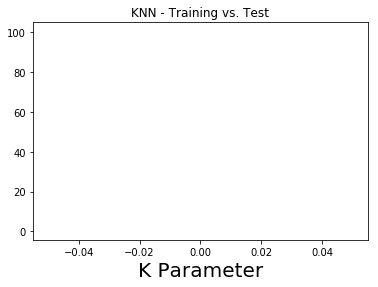

In [96]:
tuned_params('KNN')

## Run Models Again, This Timing with Tuned Parameters

In [64]:
#Run Gaussian instead of Bernoulli
NB_Model('Gaussian')
print('\n\n')

#K-Nearest Neighbors (use 25 for K instead of 5 and 'distance' for weight)
KNN_Model(25, 'distance')
print('\n\n')

#Random Forest (use 50 trees, 'entropy' as the criterion)
RFC_Model(50, 'entropy', 'auto', None)
print('\n\n')

#Lasso Logistic Regression (change alpha to 0.5)
Logistic_Reg_Model('l1', 0.5)
print('\n\n')

#Ridge Logistic Regression (change alpha to 100)
Logistic_Reg_Model('l2', 100)
print('\n\n')

#Support Vector Classifier (change kernel to 'linear')
SVC_Model(1.0, 'linear')
print('\n\n')

#Gradient boost classifier (more estimators, more depth and subsampling)
Gradient_Boost_Model(200, 4, 'deviance', 0.8)


 Percentage accuracy for Gaussian Naive Bayes
71.87%

 Cross-Validation Score
[0.71614193 0.71064468 0.7025     0.70935468 0.72036018]

 Confusion Matrix


array([[5812, 2211],
       [ 602, 1375]])



 Program Executed in 0.24




 Percentage accuracy for K Nearest Neighbors Classifier
100.0%

 Cross-Validation Score
[0.85257371 0.85557221 0.8535     0.84842421 0.85042521]

 Confusion Matrix


array([[8023,    0],
       [   0, 1977]])



 Program Executed in 17.94




 Percentage accuracy for Random Forest Classifier
99.97%

 Cross-Validation Score
[0.85057471 0.85907046 0.8595     0.84692346 0.85192596]

 Confusion Matrix


array([[8022,    1],
       [   2, 1975]])



 Program Executed in 5.14




 Percentage accuracy for Lasso Logistic Regression
86.19%

 Cross-Validation Score
[0.85457271 0.85857071 0.862      0.85742871 0.85292646]

 Confusion Matrix


array([[7653,  370],
       [1011,  966]])



 Program Executed in 227.53




 Percentage accuracy for Ridge Logistic Regression
86.5%

 Cross-Validation Score
[0.86006997 0.86556722 0.8605     0.86293147 0.85942971]

 Confusion Matrix


array([[7646,  377],
       [ 973, 1004]])



 Program Executed in 1.1




 Percentage accuracy for SVM
86.42999999999999%

 Cross-Validation Score
[0.86006997 0.86656672 0.861      0.85842921 0.85742871]

 Confusion Matrix


array([[7644,  379],
       [ 978,  999]])



 Program Executed in 144.42




 Percentage accuracy for Gradient Boosting Classifier
92.16%

 Cross-Validation Score
[0.85957021 0.85957021 0.8645     0.85692846 0.85792896]

 Confusion Matrix


array([[7876,  147],
       [ 637, 1340]])



 Program Executed in 44.07


## Conduct PCA to Reduce Features, then Feed Those Components Back into Our Models

Text(0,0.5,'Cumulative Explained Variance')

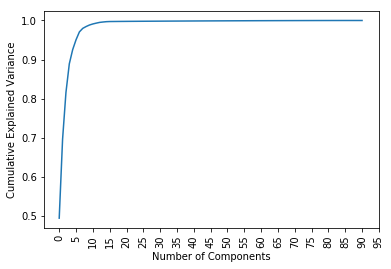

In [68]:
#Determining proper number of components

from sklearn.decomposition import PCA 

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.xticks(np.arange(0,100, 5), rotation = 'vertical')
plt.ylabel('Cumulative Explained Variance')

In [69]:
sklearn_pca = PCA(n_components=5)
weather_pca = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.4940529  0.20214596 0.1194924  0.07346376 0.03626348]


In [70]:
#Confirm dimensionality reduction
weather_pca.shape

(10000, 5)

In [71]:
#Reestablish X
X = weather_pca

#Rerun default models using PCA components

#Bernoulli Naive Bayes
NB_Model('Bernoulli')
print('\n\n')

#K-Nearest Neighbors
KNN_Model(5, 'uniform')
print('\n\n')

#Random Forest
RFC_Model(10, 'gini', 'auto', None)
print('\n\n')

#Plain Logistic Regression
Logistic_Reg_Model('l2', 1e9)
print('\n\n')

#Lasso Logistic Regression
Logistic_Reg_Model('l1', 1.0)
print('\n\n')

#Ridge Logistic Regression
Logistic_Reg_Model('l2', 1.0)
print('\n\n')

#Support Vector Classifier
SVC_Model(1.0, 'rbf')
print('\n\n')

#Gradient boost classifier
Gradient_Boost_Model(100, 3, 'deviance', 1.0)


 Percentage accuracy for Bernoulli Naive Bayes
81.43%

 Cross-Validation Score
[0.81609195 0.8145927  0.8135     0.8144072  0.81390695]

 Confusion Matrix


array([[7787,  236],
       [1621,  356]])



 Program Executed in 0.08




 Percentage accuracy for K Nearest Neighbors Classifier
87.45%

 Cross-Validation Score
[0.83858071 0.83958021 0.836      0.82291146 0.83241621]

 Confusion Matrix


array([[7678,  345],
       [ 910, 1067]])



 Program Executed in 0.44




 Percentage accuracy for Random Forest Classifier
98.3%

 Cross-Validation Score
[0.83108446 0.83808096 0.8375     0.83541771 0.82891446]

 Confusion Matrix


array([[8007,   16],
       [ 154, 1823]])



 Program Executed in 1.06




 Percentage accuracy for Logistic Regression
85.13%

 Cross-Validation Score
[0.85157421 0.85307346 0.8555     0.84392196 0.84842421]

 Confusion Matrix


array([[7690,  333],
       [1154,  823]])



 Program Executed in 0.15




 Percentage accuracy for Lasso Logistic Regression
85.13%

 Cross-Validation Score
[0.85157421 0.85307346 0.8555     0.84392196 0.84842421]

 Confusion Matrix


array([[7690,  333],
       [1154,  823]])



 Program Executed in 0.11




 Percentage accuracy for Ridge Logistic Regression
85.14%

 Cross-Validation Score
[0.85157421 0.85357321 0.8555     0.84342171 0.84842421]

 Confusion Matrix


array([[7690,  333],
       [1153,  824]])



 Program Executed in 0.13




 Percentage accuracy for SVM
99.83999999999999%

 Cross-Validation Score
[0.80209895 0.80209895 0.8025     0.8024012  0.8024012 ]

 Confusion Matrix


array([[8023,    0],
       [  16, 1961]])



 Program Executed in 27.92




 Percentage accuracy for Gradient Boosting Classifier
86.44%

 Cross-Validation Score
[0.85057471 0.84407796 0.8525     0.84242121 0.84892446]

 Confusion Matrix


array([[7705,  318],
       [1038,  939]])



 Program Executed in 3.31


## Use Recursive Feature Selection to Investigate Most Important Features Before Feature Re-Engineering Takes Place

In [38]:
#Create function for RFE

X = weather.drop(['RainTomorrow'], 1)
X = pd.get_dummies(X)

def recursive_feat_selection(model):
    selector = RFE(model)
    selector = selector.fit(X, Y)
    rankings = pd.DataFrame({'Features': X.columns, 'Ranking' : selector.ranking_})
    display(rankings.sort_values('Ranking').head(15))
    

In [39]:
#Use RFE on our top two models thus far - lasso logistic regression and
#gradient boosting

lr_lasso = LogisticRegression(penalty='l1', C=1.0)
lr_lasso.fit(X, Y)
print('Recursive Feature Selection for Lasso Logistic Regression')
recursive_feat_selection(lr_lasso)
print('\n\n')

clf = ensemble.GradientBoostingClassifier(n_estimators=100, max_depth=3, loss='deviance', subsample=1)
clf.fit(X, Y)
print('Recursive Feature Selection for Gradient Boosting')
print(clf.feature_importances_)


Recursive Feature Selection for Lasso Logistic Regression


,Features,Ranking
32,Location_Perth,1
30,Location_NorfolkIsland,1
73,WindDir9am_WNW,1
72,WindDir9am_W,1
35,Location_Sale,1
36,Location_Sydney,1
38,Location_Townsville,1
40,Location_Watsonia,1
70,WindDir9am_SSW,1
42,Location_Woomera,1





Recursive Feature Selection for Gradient Boosting
[0.05860742 0.02336583 0.03967605 0.03835134 0.09550529 0.09381263
 0.01986034 0.01002632 0.0173257  0.16339493 0.03437392 0.09693048
 0.00777657 0.03407417 0.03453209 0.02049446 0.00077122 0.
 0.01932037 0.004316   0.         0.         0.01095866 0.00073684
 0.00969356 0.00077389 0.00375423 0.         0.0012178  0.00440852
 0.00217507 0.00026221 0.02071952 0.00314627 0.0009458  0.0039869
 0.01428253 0.00382346 0.00293451 0.00641552 0.00149409 0.
 0.         0.         0.         0.         0.         0.00494412
 0.00267519 0.00650123 0.         0.00034253 0.         0.00058802
 0.00150026 0.         0.00805755 0.00846628 0.         0.
 0.         0.         0.00482959 0.         0.00996539 0.
 0.         0.00107587 0.         0.00122367 0.00263506 0.
 0.00127894 0.00183084 0.         0.         0.         0.
 0.00245033 0.00255746 0.00504084 0.00475063 0.00243524 0.00338268
 0.00210604 0.         0.00618243 0.00158767 0.         0.

Looks like Wind/Wind Gust Direction, along with Location are the most valuable features for these models.

## Take a Different Approach - Combat Class Imbalance by Taking a 50/50 DataFrame

In [40]:
#Create dataframe of only RainTomorrow observations
raintomorrow_true = weather[weather['RainTomorrow'] == 1]

#Confirm number of fraudulent observations
print(len(raintomorrow_true))

2003


In [45]:
#Create dataframe of only non-RainTomorrow observations, then take a sample
raintomorrow_not_true = weather[weather['RainTomorrow'] == 0]
raintomorrow_not_true = raintomorrow_not_true.sample(n = 2003)

#Confirm number of non-fraudulent observations
print(len(raintomorrow_not_true))

2003


In [46]:
#Combine our two dataframes (fraudulent and non-fraudulent) into one
weather_revised = raintomorrow_true.append(raintomorrow_not_true)

In [47]:
#Confirm this worked
weather_revised.head(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
117824,PerthAirport,7.1,21.2,0.0,2.2,9.1,NNW,56.0,NNE,NNE,...,53.0,27.0,1020.5,1014.7,0.0,1.0,13.6,20.8,0,1
78729,Watsonia,19.7,25.1,4.6,1.0,0.0,N,28.0,E,NNE,...,99.0,80.0,1011.4,1009.0,7.0,8.0,21.9,24.1,1,1
62309,Sale,15.6,18.0,0.0,6.4,0.0,ENE,57.0,ENE,ENE,...,69.0,80.0,1017.4,1013.3,8.0,8.0,17.3,17.9,0,1
80220,Watsonia,11.9,16.0,10.4,5.4,2.8,W,56.0,N,WSW,...,100.0,61.0,1003.3,1004.7,7.0,7.0,12.2,14.0,1,1
67734,Melbourne,19.7,23.1,0.0,15.2,0.5,WSW,63.0,WSW,N,...,62.0,87.0,1008.9,1007.9,7.0,8.0,22.8,19.6,0,1


In [48]:
#Reestablish X and Y
X = weather_revised.drop(['RainTomorrow'], 1)
X = pd.get_dummies(X)
Y = weather_revised.RainTomorrow

#Run our default models
#Bernoulli Naive Bayes
NB_Model('Bernoulli')
print('\n\n')

#K-Nearest Neighbors
KNN_Model(5, 'uniform')
print('\n\n')

#Random Forest
RFC_Model(10, 'gini', 'auto', None)
print('\n\n')

#Plain Logistic Regression
Logistic_Reg_Model('l2', 1e9)
print('\n\n')

#Lasso Logistic Regression
Logistic_Reg_Model('l1', 1.0)
print('\n\n')

#Ridge Logistic Regression
Logistic_Reg_Model('l2', 1.0)
print('\n\n')

#Support Vector Classifier
SVC_Model(1.0, 'rbf')
print('\n\n')

#Gradient boost classifier
Gradient_Boost_Model(100, 3, 'deviance', 1.0)


 Percentage accuracy for Bernoulli Naive Bayes
68.49725411882177%

 Cross-Validation Score
[0.66084788 0.69201995 0.67456359 0.67875    0.675     ]

 Confusion Matrix


array([[1374,  629],
       [ 633, 1370]])



 Program Executed in 0.12




 Percentage accuracy for K Nearest Neighbors Classifier
82.6010983524713%

 Cross-Validation Score
[0.76433915 0.75062344 0.74314214 0.7525     0.75      ]

 Confusion Matrix


array([[1673,  330],
       [ 367, 1636]])



 Program Executed in 2.11




 Percentage accuracy for Random Forest Classifier
98.87668497254118%

 Cross-Validation Score
[0.7605985  0.77182045 0.78179551 0.7875     0.76375   ]

 Confusion Matrix


array([[1987,   16],
       [  29, 1974]])



 Program Executed in 0.42




 Percentage accuracy for Logistic Regression
81.25312031952072%

 Cross-Validation Score
[0.78428928 0.78927681 0.80673317 0.795      0.78875   ]

 Confusion Matrix


array([[1635,  368],
       [ 383, 1620]])



 Program Executed in 2.77




 Percentage accuracy for Lasso Logistic Regression
80.60409385921118%

 Cross-Validation Score
[0.78678304 0.78304239 0.80049875 0.80125    0.79375   ]

 Confusion Matrix


array([[1621,  382],
       [ 395, 1608]])



 Program Executed in 70.63




 Percentage accuracy for Ridge Logistic Regression
80.60409385921118%

 Cross-Validation Score
[0.78802993 0.78553616 0.80299252 0.7975     0.79625   ]

 Confusion Matrix


array([[1624,  379],
       [ 398, 1605]])



 Program Executed in 0.48




 Percentage accuracy for SVM
97.1792311532701%

 Cross-Validation Score
[0.76309227 0.75685786 0.74438903 0.77       0.76875   ]

 Confusion Matrix


array([[1959,   44],
       [  69, 1934]])



 Program Executed in 13.76




 Percentage accuracy for Gradient Boosting Classifier
84.07388916625062%

 Cross-Validation Score
[0.78553616 0.78179551 0.79301746 0.79125    0.79      ]

 Confusion Matrix


array([[1686,  317],
       [ 321, 1682]])



 Program Executed in 5.19


## Now we have some improvement! Re-run models with tuned parameters to see if we can improve even more.

In [49]:
#Run Gaussian instead of Bernoulli
NB_Model('Gaussian')
print('\n\n')

#K-Nearest Neighbors (use 25 for K instead of 5 and 'distance' for weight)
KNN_Model(50, 'distance')
print('\n\n')

#Random Forest (use 50 trees, 'entropy' as the criterion)
RFC_Model(50, 'entropy', 'auto', None)
print('\n\n')

#Lasso Logistic Regression (change alpha to 0.5)
Logistic_Reg_Model('l1', 0.5)
print('\n\n')

#Ridge Logistic Regression (change alpha to 100)
Logistic_Reg_Model('l2', 100)
print('\n\n')

#Support Vector Classifier (change kernel to 'linear')
SVC_Model(1.0, 'linear')
print('\n\n')

#Gradient boost classifier (more estimators, more depth and subsampling)
Gradient_Boost_Model(200, 4, 'deviance', 0.8)


 Percentage accuracy for Gaussian Naive Bayes
71.59261108337493%

 Cross-Validation Score
[0.67705736 0.72568579 0.67955112 0.6975     0.715     ]

 Confusion Matrix


array([[1327,  676],
       [ 462, 1541]])



 Program Executed in 0.13




 Percentage accuracy for K Nearest Neighbors Classifier
100.0%

 Cross-Validation Score
[0.7755611  0.7755611  0.77057357 0.795      0.76375   ]

 Confusion Matrix


array([[2003,    0],
       [   0, 2003]])



 Program Executed in 3.63




 Percentage accuracy for Random Forest Classifier
99.97503744383425%

 Cross-Validation Score
[0.77930175 0.78179551 0.79551122 0.78625    0.78375   ]

 Confusion Matrix


array([[2002,    1],
       [   0, 2003]])



 Program Executed in 2.25




 Percentage accuracy for Lasso Logistic Regression
80.70394408387419%

 Cross-Validation Score
[0.78553616 0.78428928 0.8042394  0.8025     0.7975    ]

 Confusion Matrix


array([[1626,  377],
       [ 396, 1607]])



 Program Executed in 68.06




 Percentage accuracy for Ridge Logistic Regression
80.87868197703445%

 Cross-Validation Score
[0.78678304 0.78678304 0.79925187 0.79625    0.7925    ]

 Confusion Matrix


array([[1635,  368],
       [ 398, 1605]])



 Program Executed in 1.78




 Percentage accuracy for SVM
81.00349475786321%

 Cross-Validation Score
[0.78304239 0.78927681 0.79925187 0.79       0.80125   ]

 Confusion Matrix


array([[1644,  359],
       [ 402, 1601]])



 Program Executed in 51.24




 Percentage accuracy for Gradient Boosting Classifier
93.95906140788817%

 Cross-Validation Score
[0.77680798 0.78553616 0.80299252 0.81375    0.79625   ]

 Confusion Matrix


array([[1880,  123],
       [ 119, 1884]])



 Program Executed in 16.92


## Try One Final Run with Re-Engineered Features

In [50]:
weather.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,13.360890,24.400980,0.871290,5.628870,7.993140,40.668700,15.628800,19.774900,64.355100,48.110900,1017.429850,1014.922810,4.091800,4.194700,18.269010,22.901590,0.18010,0.200300
std,6.386144,6.986956,2.139658,3.683163,3.672967,13.326369,8.271206,8.541635,18.411412,19.974611,6.787321,6.789047,2.790475,2.648715,6.571914,6.849299,0.38429,0.400245
min,-5.300000,7.700000,0.000000,0.000000,0.000000,11.000000,2.000000,2.000000,3.000000,1.000000,982.900000,981.900000,0.000000,0.000000,-0.600000,4.800000,0.00000,0.000000
25%,8.500000,18.900000,0.000000,3.000000,5.500000,31.000000,9.000000,13.000000,54.000000,34.000000,1012.900000,1010.200000,1.000000,1.000000,13.200000,17.500000,0.00000,0.000000
50%,13.100000,24.100000,0.000000,5.000000,8.900000,39.000000,15.000000,19.000000,66.000000,49.000000,1017.400000,1014.900000,4.000000,5.000000,17.800000,22.700000,0.00000,0.000000
75%,18.300000,30.000000,0.400000,7.600000,10.800000,48.000000,20.000000,26.000000,77.000000,61.000000,1022.000000,1019.600000,7.000000,7.000000,23.200000,28.200000,0.00000,0.000000
max,29.800000,46.800000,12.200000,65.400000,14.000000,113.000000,61.000000,76.000000,100.000000,100.000000,1039.200000,1036.400000,8.000000,8.000000,39.000000,46.100000,1.00000,1.000000


In [51]:
#Convert features to 1 (high) or 0 (low) based on the median

weather_revised['MinTemp'] = np.where((weather_revised['MinTemp'] >= 13.1), 1, 0)
weather_revised['MaxTemp'] = np.where((weather_revised['MaxTemp'] >= 24.05), 1, 0)
weather_revised['Rainfall'] = np.where((weather_revised['Rainfall'] > 0), 1, 0)
weather_revised['Evaporation'] = np.where((weather_revised['Evaporation'] >= 5), 1, 0)
weather_revised['Sunshine'] = np.where((weather_revised['Sunshine'] >= 8.8), 1, 0)
weather_revised['WindGustSpeed'] = np.where((weather_revised['WindGustSpeed'] >= 39), 1, 0)
weather_revised['WindSpeed9am'] = np.where((weather_revised['WindSpeed9am'] >= 15), 1, 0)
weather_revised['WindSpeed3pm'] = np.where((weather_revised['WindSpeed3pm'] >= 19), 1, 0)
weather_revised['Humidity9am'] = np.where((weather_revised['Humidity9am'] >= 66), 1, 0)
weather_revised['Humidity3pm'] = np.where((weather_revised['Humidity3pm'] >= 50), 1, 0)
weather_revised['Pressure9am'] = np.where((weather_revised['Pressure9am'] >= 1017.4), 1, 0)
weather_revised['Pressure3pm'] = np.where((weather_revised['Pressure3pm'] >= 1014.8), 1, 0)
weather_revised['Cloud9am'] = np.where((weather_revised['Cloud9am'] >= 4), 1, 0)
weather_revised['Cloud3pm'] = np.where((weather_revised['Cloud3pm'] >= 5), 1, 0)
weather_revised['Temp9am'] = np.where((weather_revised['Temp9am'] >= 17.8), 1, 0)
weather_revised['Temp3pm'] = np.where((weather_revised['Temp3pm'] >= 22.55), 1, 0)

## Re-run Default Models with New Feature Set

In [52]:
#Reestablish X and Y
X = weather_revised.drop(['RainTomorrow'], 1)
X = pd.get_dummies(X)
Y = weather_revised.RainTomorrow

In [53]:
#Bernoulli Naive Bayes
NB_Model('Bernoulli')
print('\n\n')

#K-Nearest Neighbors
KNN_Model(5, 'uniform')
print('\n\n')

#Random Forest
RFC_Model(10, 'gini', 'auto', None)
print('\n\n')

#Plain Logistic Regression
Logistic_Reg_Model('l2', 1e9)
print('\n\n')

#Lasso Logistic Regression
Logistic_Reg_Model('l1', 1.0)
print('\n\n')

#Ridge Logistic Regression
Logistic_Reg_Model('l2', 1.0)
print('\n\n')

#Support Vector Classifier
SVC_Model(1.0, 'rbf')
print('\n\n')

#Gradient boost classifier
Gradient_Boost_Model(100, 3, 'deviance', 1.0)


 Percentage accuracy for Bernoulli Naive Bayes
76.08587119321018%

 Cross-Validation Score
[0.75187032 0.75436409 0.77306733 0.74125    0.7525    ]

 Confusion Matrix


array([[1458,  545],
       [ 413, 1590]])



 Program Executed in 0.1




 Percentage accuracy for K Nearest Neighbors Classifier
81.30304543185221%

 Cross-Validation Score
[0.73690773 0.71321696 0.74438903 0.71875    0.74375   ]

 Confusion Matrix


array([[1481,  522],
       [ 227, 1776]])



 Program Executed in 6.83




 Percentage accuracy for Random Forest Classifier
98.65202196704944%

 Cross-Validation Score
[0.76184539 0.72693267 0.73316708 0.7475     0.75      ]

 Confusion Matrix


array([[1987,   16],
       [  38, 1965]])



 Program Executed in 0.37




 Percentage accuracy for Logistic Regression
78.0828756864703%

 Cross-Validation Score
[0.75685786 0.76433915 0.79551122 0.76375    0.75625   ]

 Confusion Matrix


array([[1514,  489],
       [ 389, 1614]])



 Program Executed in 0.12




 Percentage accuracy for Lasso Logistic Regression
77.95806290564154%

 Cross-Validation Score
[0.75935162 0.76683292 0.79301746 0.7625     0.7575    ]

 Confusion Matrix


array([[1506,  497],
       [ 386, 1617]])



 Program Executed in 0.4




 Percentage accuracy for Ridge Logistic Regression
77.98302546180729%

 Cross-Validation Score
[0.75561097 0.76433915 0.79551122 0.76625    0.75875   ]

 Confusion Matrix


array([[1509,  494],
       [ 388, 1615]])



 Program Executed in 0.12




 Percentage accuracy for SVM
77.38392411382927%

 Cross-Validation Score
[0.7605985  0.76184539 0.77182045 0.76       0.7625    ]

 Confusion Matrix


array([[1426,  577],
       [ 329, 1674]])



 Program Executed in 8.03




 Percentage accuracy for Gradient Boosting Classifier
80.60409385921118%

 Cross-Validation Score
[0.7605985  0.76558603 0.78428928 0.7675     0.7675    ]

 Confusion Matrix


array([[1571,  432],
       [ 345, 1658]])



 Program Executed in 5.59


## After creating an equally balanced dataframe, we achieved nearly 20% higher than the 50% baseline. Specifically, logistic regression proved most accurate without overfitting, coming in at approximately 79% accuracy during cross-validation.